In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
df=pd.read_csv(r'G:\My Drive\Mysidework documents\Less than 7 Hours Sleep Among Adults.csv')

In [136]:
df.head()

,SHID,Geography,Obesity Among Adults,Less Than 7 Hours Sleep Among Adults
0,country:us/tract:48441011400,Tract 48441011400,34.6,32.8
1,country:us/tract:48441011300,Tract 48441011300,39.3,34.8
2,country:us/tract:48441013300,Tract 48441013300,31.1,31.2
3,country:us/tract:48441011700,Tract 48441011700,38.7,34.8
4,country:us/tract:48441012900,Tract 48441012900,30.3,34.2


In [137]:
df.shape

(37, 4)

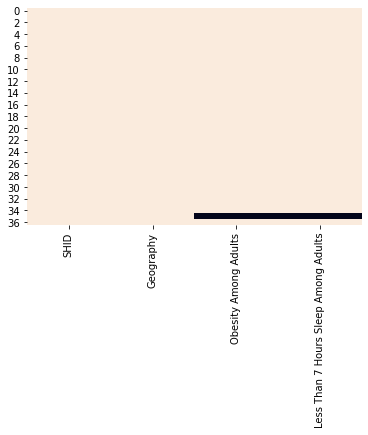

In [138]:
sns.heatmap(df.notnull(),cbar=False)

In [139]:
df.dropna(inplace=True,axis=0)

In [140]:
df.shape

(36, 4)

In [141]:
df.drop(['SHID','Geography'],inplace=True,axis=1)

In [142]:
df.describe()

,Obesity Among Adults,Less Than 7 Hours Sleep Among Adults
count,36.000000,36.000000
mean,34.850000,33.441667
std,5.643682,3.077882
min,21.900000,26.700000
25%,30.600000,31.275000
50%,33.700000,33.600000
75%,39.150000,35.075000
max,52.200000,41.600000


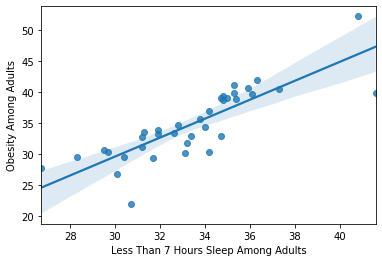

In [143]:
sns.regplot(df['Less Than 7 Hours Sleep Among Adults'],df['Obesity Among Adults'])

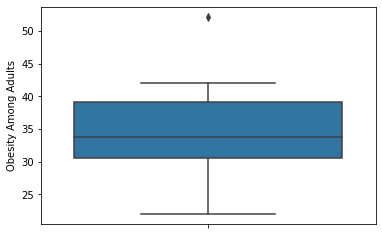

In [144]:
sns.boxplot(y=df['Obesity Among Adults'])

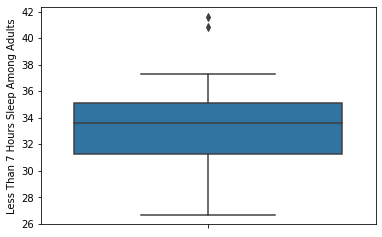

In [145]:
sns.boxplot(y=df['Less Than 7 Hours Sleep Among Adults'])

In [146]:
Q1=df.quantile(0.25)

Q3=df.quantile(0.75)

IQR=Q3-Q1

df=df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [149]:
corr=df.corr()

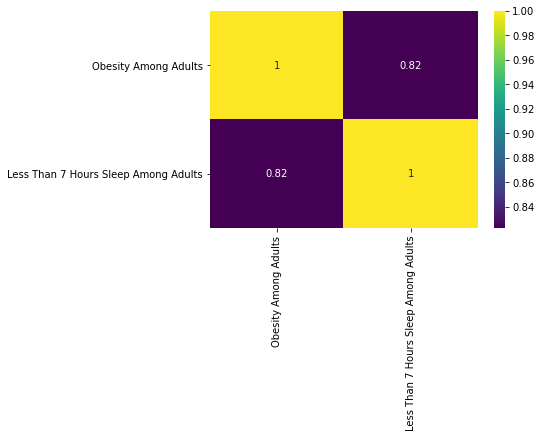

In [150]:
sns.heatmap(corr,cmap='viridis',annot=True)

In [151]:
df.rename(columns={'Less Than 7 Hours Sleep Among Adults':'Less_Than_7_Hours_Sleep_Among_Adults',
                      'Obesity Among Adults':'Obesity'},inplace=True)

## 1st method

In [152]:
y=df.iloc[:,:-1]

x=df.iloc[:,-1:]


In [153]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [155]:
lr_model=LinearRegression(normalize=True)

lr_model.fit(X_train,y_train)

LinearRegression(normalize=True)

Text(0.5, 1.0, 'Obesity Among Adults Vs. Less Than 7 Hours Sleep Among Adults (Training set)')

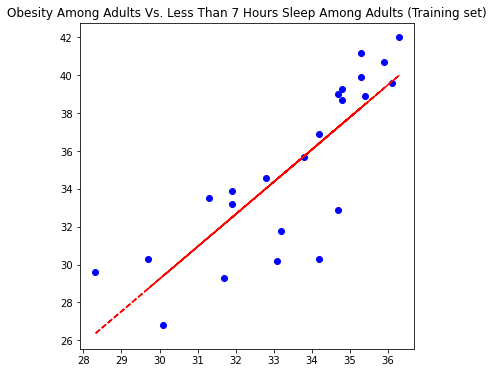

In [156]:
plt.figure(figsize=(6,6))

plt.scatter(X_train,y_train,color='blue')

plt.plot(X_train,lr_model.predict(X_train),color='red',linestyle = "--" )

plt.title('Obesity Among Adults Vs. Less Than 7 Hours Sleep Among Adults (Training set)')

Text(0.5, 1.0, 'Obesity Among Adults Vs. Less Than 7 Hours Sleep Among Adults (Test set)')

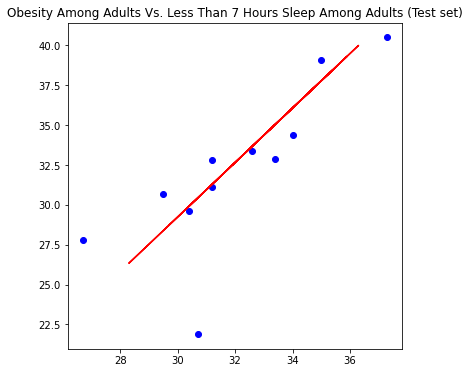

In [157]:
plt.figure(figsize=(6,6))

plt.scatter(X_test,y_test,color='blue')

plt.plot(X_train,lr_model.predict(X_train),color='red')

plt.title('Obesity Among Adults Vs. Less Than 7 Hours Sleep Among Adults (Test set)')

In [158]:
print(lr_model.intercept_)

print(lr_model.coef_)

[-22.00909785]
[[1.70826413]]


In [159]:
from sklearn.metrics import r2_score

In [160]:
lr_model.score(X_test, y_test)

0.5798782141356768

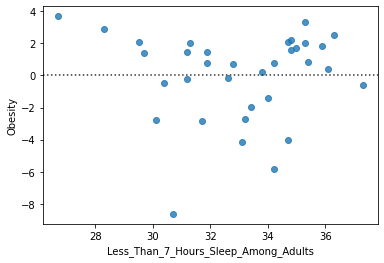

In [161]:
sns.residplot(df['Less_Than_7_Hours_Sleep_Among_Adults'],df['Obesity'])

### 2nd method

In [162]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [163]:
model = ols("Obesity ~ Less_Than_7_Hours_Sleep_Among_Adults", data=df).fit()

In [164]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     66.98
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           2.39e-09
Time:                        15:19:21   Log-Likelihood:                -82.166
No. Observations:                  34   AIC:                             168.3
Df Residuals:                      32   BIC:                             171.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


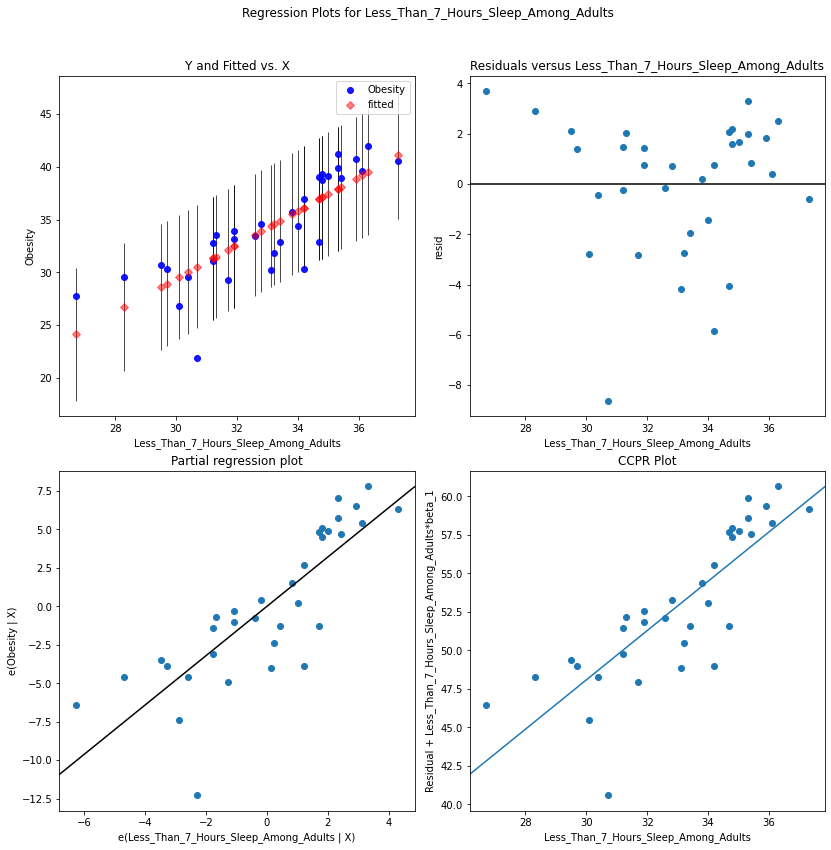

In [165]:
fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_regress_exog(model, "Less_Than_7_Hours_Sleep_Among_Adults", fig=fig)

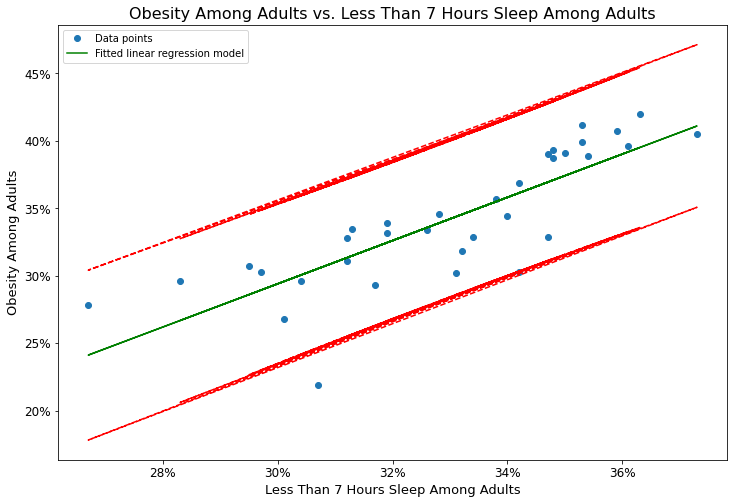

In [200]:
x = df['Less_Than_7_Hours_Sleep_Among_Adults']

y = df['Obesity']

_,interval_l, interval_u=wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, y, 'o', label="Data points")

ax.plot(x, model.fittedvalues, 'g', label="Fitted linear regression model")

ax.plot(x,interval_u, 'r--')

ax.plot(x, interval_l, 'r--')

ax.set_xlabel('Less Than 7 Hours Sleep Among Adults',fontsize=13)

ax.set_ylabel('Obesity Among Adults',fontsize=13)

ax.set_title('Obesity Among Adults vs. Less Than 7 Hours Sleep Among Adults',fontsize=16)

y_value=['{:,.0f}'.format(x) + '%' for x in ax.get_yticks()]

ax.set_yticklabels(y_value)

x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]

ax.set_xticklabels(x_value)

plt.tick_params(labelsize=12)

ax.legend(loc='best');